In [666]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score
import itertools
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder #pour le recodage des variables catégorielles  
from sklearn.preprocessing import MinMaxScaler # pour effectuer la normalisations min-max
from sklearn.compose import make_column_transformer # Applique des transformateurs aux colonnes d'un tableau
from sklearn.pipeline import make_pipeline


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [667]:
df=pd.read_csv("..\preparationdedonnee\X.csv")
df

,DETT,DNAIS,AGEINC,SURFC,MUT01,MYBPC3,MYH7,TNNT2,TNNI3,GRADIENTMAXREPOSINTRAVG,...,"RECOESC(4%)_0,non",RECOESC(4%)_0.non,RECOESC(4%)_1.oui,RECOESC6%_0.non,RECOESC6%_1.oui,RECOAHA_0.non,RECOAHA_1.oui,RECOAHAétendue_0.non,RECOAHAétendue_1.oui,CJP
0,22860000,18512640,0.393737,0.018393,1,0,0,0,0,-0.586110,...,0,1,0,1,0,1,0,1,0,0
1,23726880,27348480,-0.573401,-1.321096,0,0,0,0,0,-0.586110,...,0,1,0,1,0,1,0,1,0,0
2,22597920,17396640,0.458213,0.018393,1,0,0,0,0,-0.255045,...,0,1,0,1,0,1,0,1,0,0
3,24200640,29167200,-0.766829,-0.794868,0,0,0,0,0,-0.586110,...,0,0,1,1,0,0,1,0,1,0
4,23323680,36230400,-1.733967,0.783816,0,0,0,0,0,-0.586110,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,22183200,15276960,0.716116,-1.703808,1,0,0,1,0,-0.420577,...,0,1,0,1,0,0,1,0,1,0
427,21178080,21460320,-0.186546,0.496782,0,0,0,0,0,-0.453684,...,0,1,0,1,0,0,1,0,1,0
428,22527360,25336800,-0.508926,-0.412157,0,0,0,0,0,3.320454,...,0,1,0,1,0,1,0,0,1,0
429,20763360,31668480,-1.476064,0.640299,0,0,0,0,0,-0.486790,...,0,1,0,1,0,0,1,0,1,0


In [668]:
Y = df['CJP']
X = df.drop('CJP',axis=1)

<h2>Jeux 1 :</H2>

In [669]:
col_europe=["AGEINC","GRADIENTMAXREPOSINTRAVG","EPMAXETT","DOG","TVNS","SYNC","ANTEMS"]
Xeurop=X[col_europe]
Xeurop.head(5)

,AGEINC,GRADIENTMAXREPOSINTRAVG,EPMAXETT,DOG,TVNS,SYNC,ANTEMS
0,0.393737,-0.586110,-1.438222,-0.822560,0,0,0
1,-0.573401,-0.586110,-1.438222,-0.987750,0,0,0
2,0.458213,-0.255045,-1.229770,0.333771,0,0,0
3,-0.766829,-0.586110,1.688558,-0.860681,0,1,0
4,-1.733967,-0.586110,-1.646674,-0.949629,0,0,0


<AxesSubplot: >

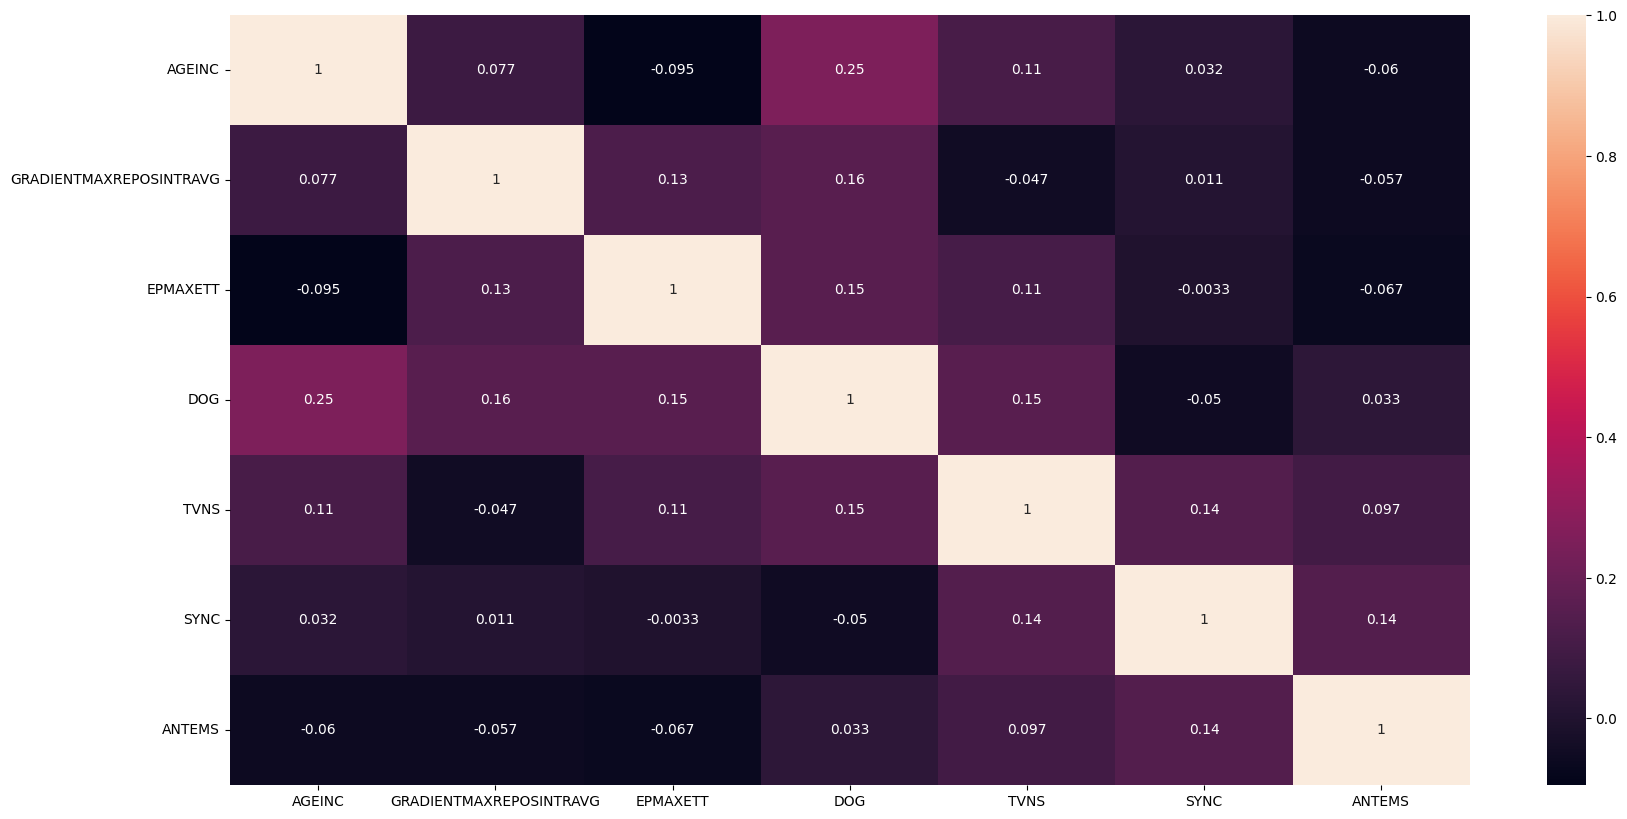

In [670]:
plt.figure(figsize=(20,10)) 
sns.heatmap(Xeurop.corr(), annot= True)

In [671]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Xeurop,Y,test_size=0.25)

In [672]:
# Entraîner un modèle de régression logistique
logistic1 = LogisticRegression(random_state=16)
logistic1.fit(x_train, y_train)
logistic_pred1 = logistic1.predict(x_test)
logistic_acc1 = logistic1.score(x_test, y_test)
print(logistic_acc1) 

0.8333333333333334


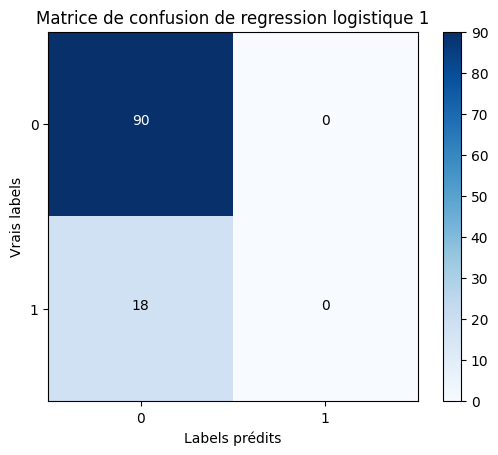

In [673]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y_test, y_pred=logistic_pred1)
classes = range(0,2)
plt.figure()

plt.imshow(matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion de regression logistique 1")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],
             horizontalalignment="center",
             color="white" if matrix[i, j] > ( matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [674]:
# Entraîner un modèle de random forest
rf1 = RandomForestClassifier(n_estimators=100, oob_score=True)
rf1.fit(x_train, y_train)

# Prédire les sorties pour les données de test
rf_pred1 = rf1.predict(x_test)
# Calculer les métriques pour chaque modèle
rf_acc1 = accuracy_score(y_test, rf_pred1)
#OOB erreur
oob_error1 = 1 - rf1.oob_score_
print(rf_acc1) 

0.8333333333333334


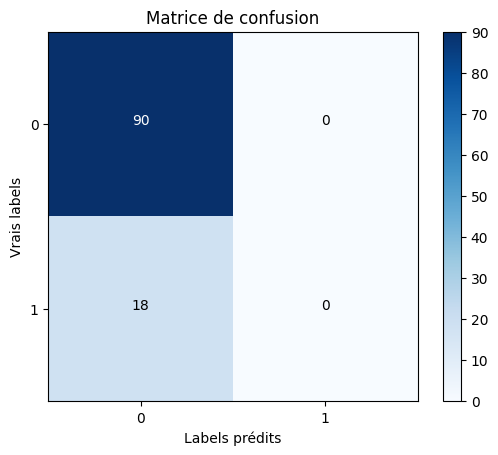

In [675]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y_test, y_pred=rf_pred1)
classes = range(0,2)
plt.figure()

plt.imshow(matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],
             horizontalalignment="center",
             color="white" if matrix[i, j] > ( matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

<h2>Jeux 2 :</H2>

In [676]:
col_usa=["AGEINC","GRADIENTMAXREPOSINTRAVG","EPMAXETT","DOG","TVNS","SYNC","ANTEMS","Simpsonbiplan(%)","ANVR","FIBROSEextensive_0.non",'FIBROSEextensive_1.oui']
Xusa=X[col_usa]


<AxesSubplot: >

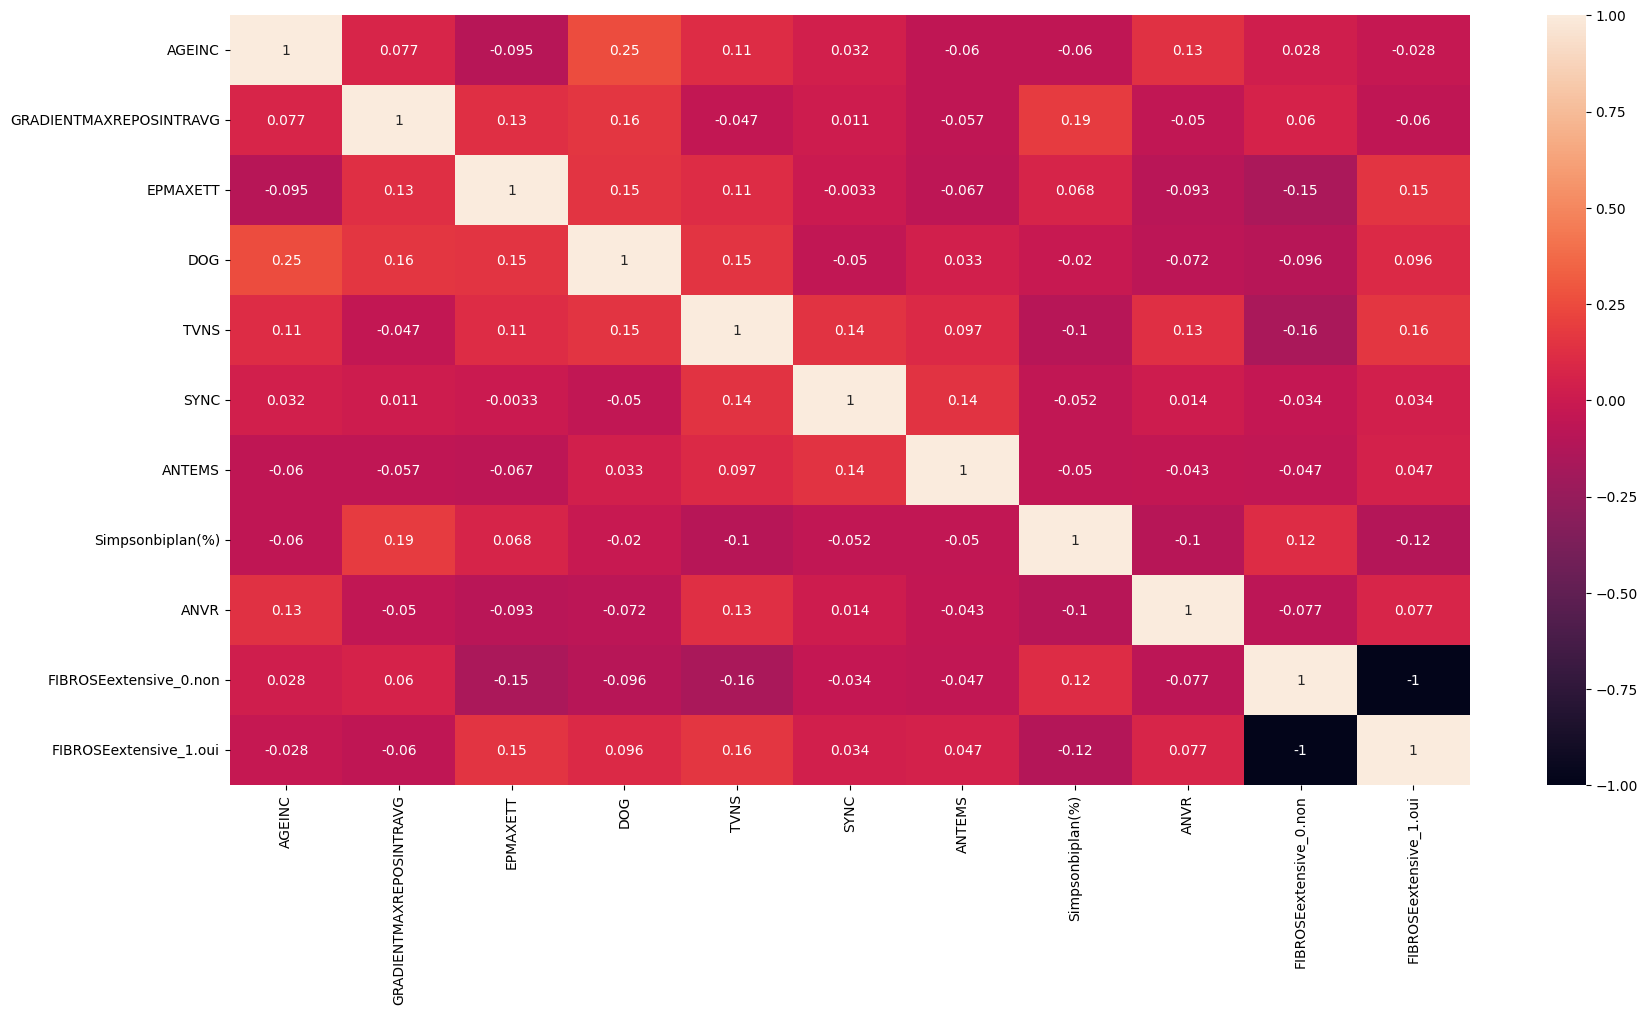

In [677]:
plt.figure(figsize=(20,10)) 
sns.heatmap(Xusa.corr(), annot= True)

In [678]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(Xusa,Y,test_size=0.25)

In [679]:
# Entraîner un modèle de régression logistique
logistic2 = LogisticRegression()
logistic2.fit(x_train2, y_train2)
logistic_pred2 = logistic2.predict(x_test2)
logistic_acc2 = accuracy_score(y_test2, logistic_pred2)
print(logistic_acc2)

0.8518518518518519


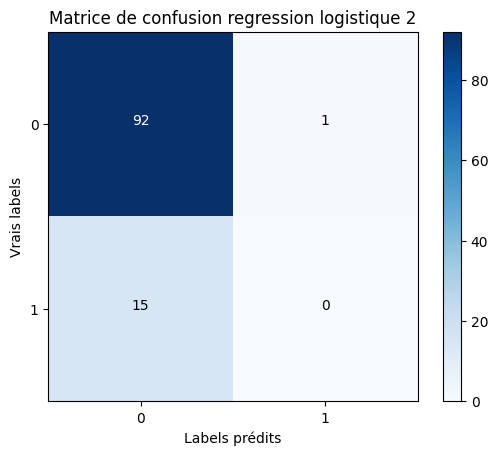

In [680]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y_test2, y_pred=logistic_pred2)
classes = range(0,2)
plt.figure()

plt.imshow(matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion regression logistique 2")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],
             horizontalalignment="center",
             color="white" if matrix[i, j] > ( matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [681]:
# Entraîner un modèle de random forest
rf2 = RandomForestClassifier(n_estimators=100, oob_score=True)
rf2.fit(x_train2, y_train2)

# Prédire les sorties pour les données de test

rf_pred2 = rf2.predict(x_test2)

# Calculer les métriques pour chaque modèle

rf_acc2 = accuracy_score(y_test2, rf_pred2)

#OOB erreur
oob_error2 = 1 - rf2.oob_score_
print(rf_acc2)

0.8611111111111112


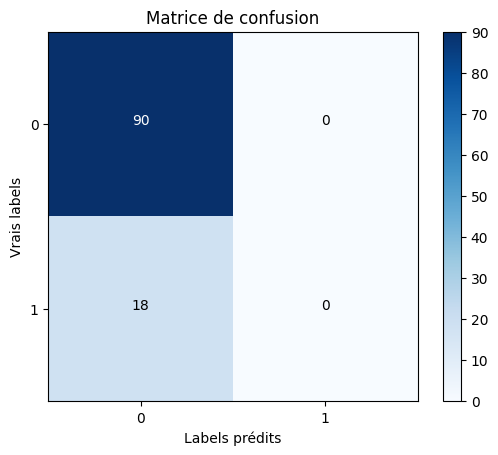

In [682]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y_test, y_pred=rf_pred2)
classes = range(0,2)
plt.figure()

plt.imshow(matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],
             horizontalalignment="center",
             color="white" if matrix[i, j] > ( matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()


<h2>Jeux 3 :</H2> 
['CJP',
 'LASRa4C',
 'LASRs4C',
 'DATEDERNIIERENOUVELLES',
 'PALS4C',
 'DNAIS',
 'Simpsonbiplan(%)',
 'DETT',
 'suivi',
 'PACS4C',
 'LASRe4C',
 'AGEINC',
 'GLSVG',
 'SURFC',
 'TPCS4C',
 'VOG',
 'EPMAXETT',
 'TPLS4C',

In [683]:
listjeux3=["PALS2C","LASRa2C","TPCS4C","SURFC","FEVG","TPLS2C","PACS4C",'TPLS4C',"LASRe4C","LASRs2C",'AGEINC']
X_3j=X[listjeux3]

<AxesSubplot: >

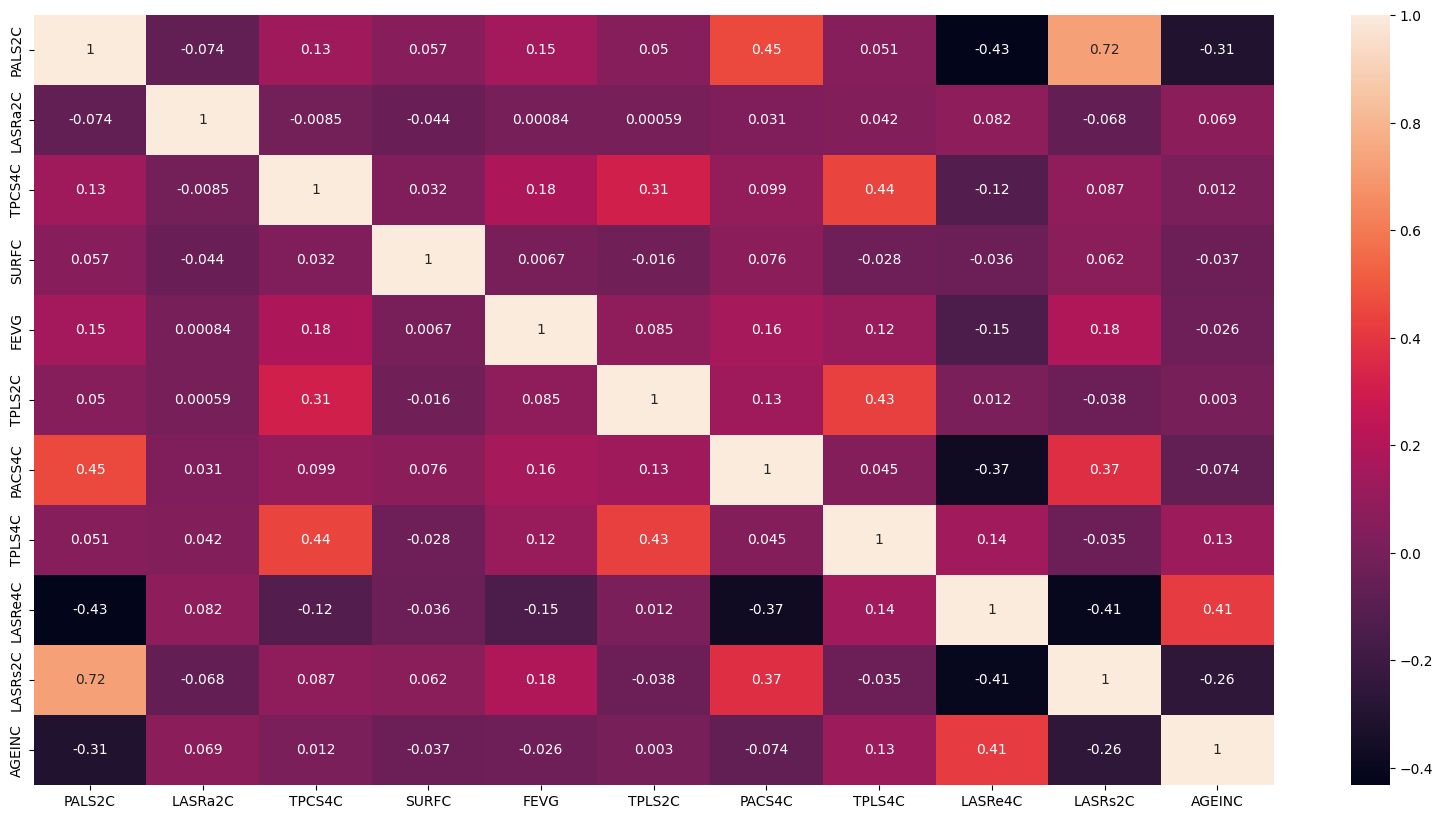

In [684]:
plt.figure(figsize=(20,10)) 
sns.heatmap(X_3j.corr(), annot= True)

In [685]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(X_3j,Y,test_size=0.25)

In [686]:
# Entraîner un modèle de régression logistique
logistic3 = LogisticRegression()
logistic3.fit(x_train3, y_train3)
logistic_pred3 = logistic3.predict(x_test3)
logistic_acc3 = logistic3.score(x_test3,y_test3)
print(logistic_acc3)

0.9074074074074074


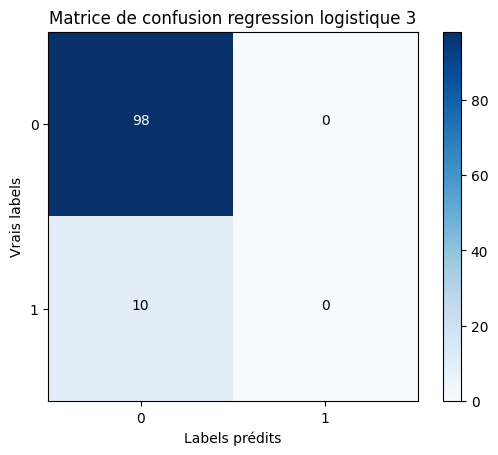

In [687]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y_test3, y_pred=logistic_pred3)
classes = range(0,2)
plt.figure()

plt.imshow(matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion regression logistique 3")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],
             horizontalalignment="center",
             color="white" if matrix[i, j] > ( matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [688]:
# Entraîner un modèle de random forest
rf3 = RandomForestClassifier(n_estimators=100, oob_score=True)
rf3.fit(x_train3, y_train3)

# Prédire les sorties pour les données de test

rf_pred3 = rf3.predict(x_test3)

# Calculer les métriques pour chaque modèle
rf_acc3 = accuracy_score(y_test3, rf_pred3)

#OOB erreur
oob_error3 = 1 - rf3.oob_score_
print(rf_acc3)

0.8981481481481481


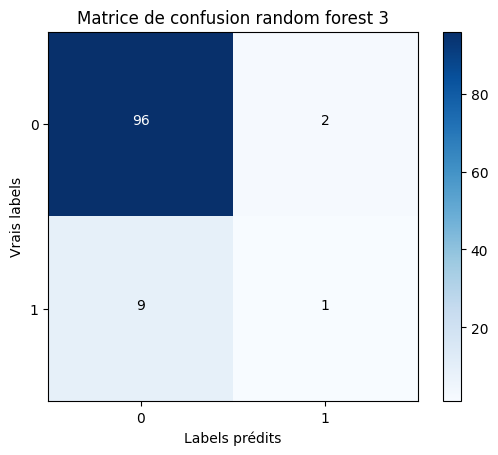

In [689]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y_test3, y_pred=rf_pred3)
classes = range(0,2)
plt.figure()

plt.imshow(matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion random forest 3")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],
             horizontalalignment="center",
             color="white" if matrix[i, j] > ( matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

<h2>Jeux 4 :</H2> variables à considérer PACS 4C, Simpson biplan (%), Syncope et TVNS.

In [690]:
listjeux4=["PACS4C","Simpsonbiplan(%)","SYNC","TVNS"]
X_4j=X[listjeux4]

<AxesSubplot: >

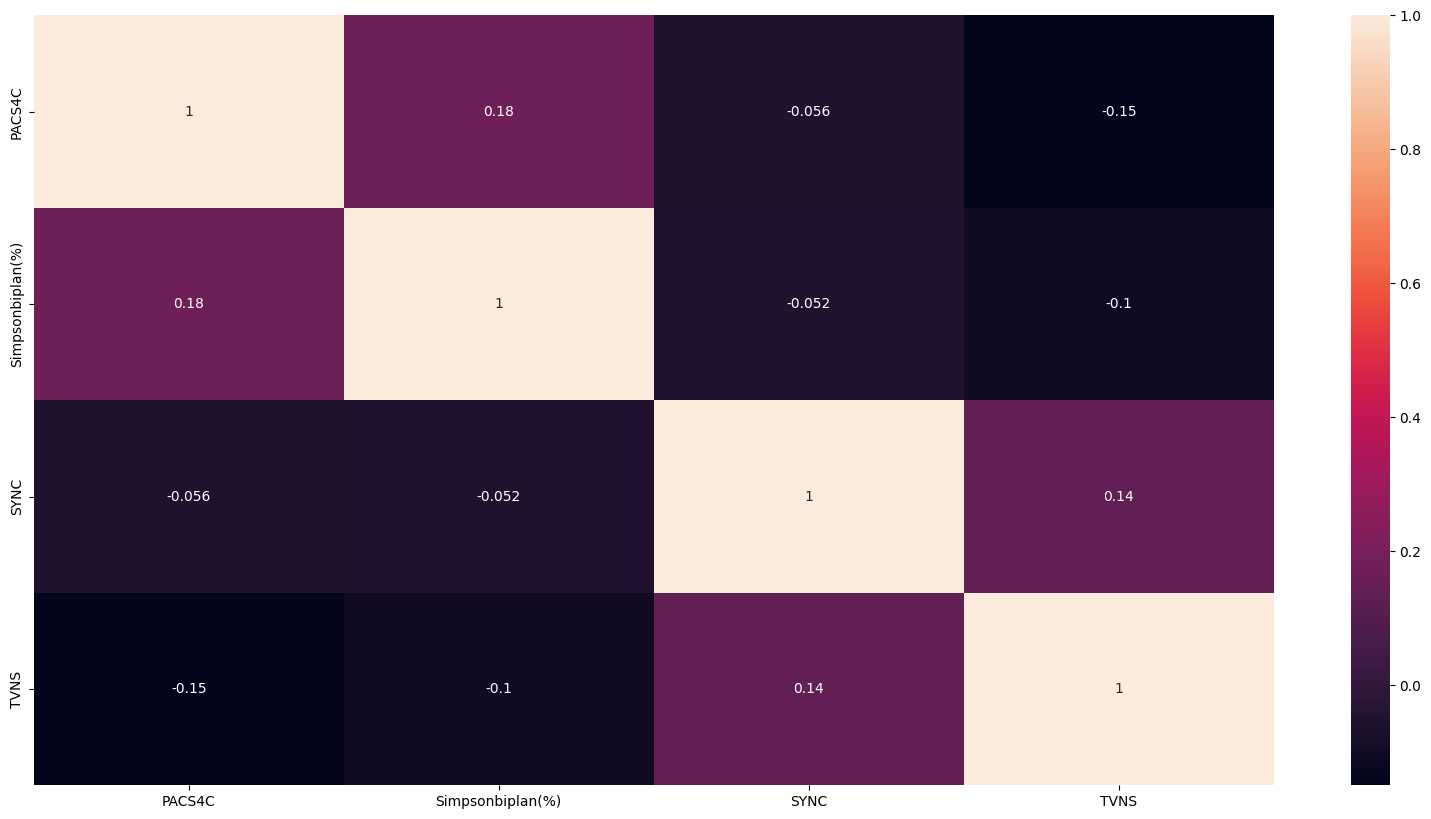

In [691]:
plt.figure(figsize=(20,10)) 
sns.heatmap(X_4j.corr(), annot= True)

In [692]:
from sklearn.model_selection import train_test_split
x_train4,x_test4,y_train4,y_test4=train_test_split(X_4j,Y,test_size=0.25)

In [693]:
# Entraîner un modèle de régression logistique
logistic4 = LogisticRegression()
logistic4.fit(x_train4, y_train4)
logistic_pred4 = logistic4.predict(x_test4)
logistic_acc4 = logistic4.score(x_test4,y_test4)
print(logistic_acc4)

0.8611111111111112


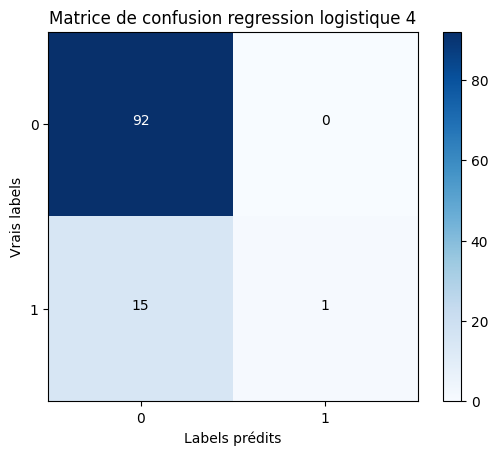

In [694]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y_test4, y_pred=logistic_pred4)
classes = range(0,2)
plt.figure()

plt.imshow(matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion regression logistique 4")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],
             horizontalalignment="center",
             color="white" if matrix[i, j] > ( matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [695]:
# Entraîner un modèle de random forest
rf4 = RandomForestClassifier(n_estimators=100, oob_score=True)
rf4.fit(x_train4, y_train4)
# Prédire les sorties pour les données de test
rf_pred4 = rf4.predict(x_test4)
# Calculer les métriques pour chaque modèle
rf_acc4 = rf4.score(x_test4,y_test4)
#OOB erreur
oob_error4 = 1 - rf4.oob_score_
print(rf_acc4)

0.8240740740740741


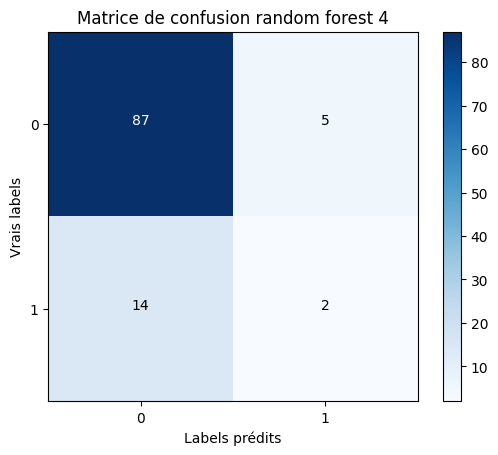

In [696]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y_test4, y_pred=rf_pred4)
classes = range(0,2)
plt.figure()

plt.imshow(matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion random forest 4")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],
             horizontalalignment="center",
             color="white" if matrix[i, j] > ( matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [697]:
# Afficher les résultats dans un tableau
print("Modèle       | J1       | J2       | J3         | J4      ")
print("Logistic     | {:.4f}   | {:.4f}   | {:.4f}     | {:.4f}  ".format(logistic_acc1, logistic_acc2, logistic_acc3, logistic_acc4))
print("RandomForest | {:.4f}   | {:.4f}   | {:.4f}     | {:.4f}  ".format(rf_acc1,rf_acc2, rf_acc3, rf_acc4))


Modèle       | J1       | J2       | J3         | J4      
Logistic     | 0.8333   | 0.8519   | 0.9074     | 0.8611  
RandomForest | 0.8333   | 0.8611   | 0.8981     | 0.8241  


In [698]:
# Afficher les résultats (RandomForest)
print("RandomForest | J1       | J2       | J3         | J4      ")
print("accuracy     | {:.4f}   | {:.4f}   | {:.4f}     | {:.4f}  ".format(rf_acc1,rf_acc2, rf_acc3, rf_acc4))
print("l'erreur     | {:.4f}   | {:.4f}   | {:.4f}     | {:.4f}  ".format(oob_error1,oob_error2,oob_error3,oob_error4))


RandomForest | J1       | J2       | J3         | J4      
accuracy     | 0.8333   | 0.8611   | 0.8981     | 0.8241  
l'erreur     | 0.1115   | 0.1300   | 0.1486     | 0.1362  
